In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import tensorflow as tf

ImportError: Traceback (most recent call last):
  File "C:\Users\natha\anaconda3\envs\py3-TF2.0\lib\site-packages\tensorflow\python\pywrap_tensorflow.py", line 58, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "C:\Users\natha\anaconda3\envs\py3-TF2.0\lib\site-packages\tensorflow\python\pywrap_tensorflow_internal.py", line 28, in <module>
    _pywrap_tensorflow_internal = swig_import_helper()
  File "C:\Users\natha\anaconda3\envs\py3-TF2.0\lib\site-packages\tensorflow\python\pywrap_tensorflow_internal.py", line 24, in swig_import_helper
    _mod = imp.load_module('_pywrap_tensorflow_internal', fp, pathname, description)
  File "C:\Users\natha\anaconda3\envs\py3-TF2.0\lib\imp.py", line 242, in load_module
    return load_dynamic(name, filename, file)
  File "C:\Users\natha\anaconda3\envs\py3-TF2.0\lib\imp.py", line 342, in load_dynamic
    return _load(spec)
ImportError: DLL load failed: The paging file is too small for this operation to complete.


Failed to load the native TensorFlow runtime.

See https://www.tensorflow.org/install/errors

for some common reasons and solutions.  Include the entire stack trace
above this error message when asking for help.

In [3]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D, Conv1D, MaxPooling1D, Embedding
from tensorflow.keras.models import Model

In [4]:
df = pd.read_csv('spam.csv',encoding = 'ISO-8859-1')

In [5]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1, inplace=True)
df.columns = [ 'labels', 'data']
df['b_labels'] = df['labels'].map({'ham':0, 'spam': 1})
Y = df['b_labels'].values
df_train, df_test, Ytrain, Ytest = train_test_split(df['data'],Y,test_size=0.33)

In [6]:
MAX_VOCAB_SIZE = 20000
tokenizer = Tokenizer(num_words = MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(df_train)
sequences_train = tokenizer.texts_to_sequences(df_train)
sequences_test = tokenizer.texts_to_sequences(df_test)

In [10]:
word2idx = tokenizer.word_index
V = len(word2idx)
print('# of tokens:', V)

# of tokens: 7268


In [11]:
data_train = pad_sequences(sequences_train)
T = data_train.shape[1]
data_train.shape

(3733, 189)

In [12]:
data_test = pad_sequences(sequences_test, maxlen =T)
data_test.shape

(1839, 189)

In [13]:
D = 20

i = Input(shape=(T,))
x = Embedding(V+1,D)(i)
x = Conv1D(32, 3,activation='relu')(x)
x = MaxPooling1D(3)(x)
x = Conv1D(64, 3,activation='relu')(x)
x = MaxPooling1D(3)(x)
x = Conv1D(128, 3,activation='relu')(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1, activation = 'sigmoid')(x)
model = Model(i,x)

In [14]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer= 'adam',
    metrics = ['accuracy']
)
r = model.fit(
    data_train, Ytrain,
    epochs=10,
    validation_data = (data_test, Ytest)
)

Epoch 1/10
117/117 [==============================] - 4s 34ms/step - loss: 0.3999 - accuracy: 0.8570 - val_loss: 0.2779 - val_accuracy: 0.8717
Epoch 2/10
117/117 [==============================] - 4s 32ms/step - loss: 0.1480 - accuracy: 0.9384 - val_loss: 0.0792 - val_accuracy: 0.9788
Epoch 3/10
117/117 [==============================] - 4s 38ms/step - loss: 0.0234 - accuracy: 0.9946 - val_loss: 0.0496 - val_accuracy: 0.9880
Epoch 4/10
117/117 [==============================] - 4s 32ms/step - loss: 0.0066 - accuracy: 0.9984 - val_loss: 0.0606 - val_accuracy: 0.9869
Epoch 5/10
117/117 [==============================] - 4s 31ms/step - loss: 0.0031 - accuracy: 0.9995 - val_loss: 0.0531 - val_accuracy: 0.9886
Epoch 6/10
117/117 [==============================] - 4s 30ms/step - loss: 0.0027 - accuracy: 0.9995 - val_loss: 0.0625 - val_accuracy: 0.9886
Epoch 7/10
117/117 [==============================] - 4s 30ms/step - loss: 0.0023 - accuracy: 0.9995 - val_loss: 0.0531 - val_accuracy: 0.9891

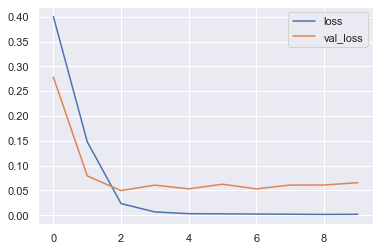

In [15]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

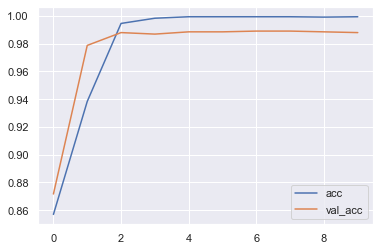

In [16]:
plt.plot(r.history['accuracy'],label='acc')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.legend()